# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# Import data

In [2]:
customers_df = pd.read_csv('../data/original_data/olist_customers_dataset.csv')    
delivered_data = pd.read_csv('../data/processed_data/olist_delivered_customers.csv') 

In [3]:
delivered_data.nunique()

customer_id                      96478
customer_unique_id               93358
customer_zip_code_prefix         14889
customer_city                     4085
customer_state                      27
customer_country                     1
geolocation_lat                  14779
geolocation_lng                  14780
order_id                         96478
order_status                         1
order_purchase_timestamp         95956
order_approved_at                88274
order_delivered_carrier_date     80106
order_delivered_customer_date    95665
order_estimated_delivery_date      445
total_number_of_items               17
total_order_value                29918
dtype: int64

# Overview data

In [4]:
# Overview 'customers_df'
print('Shape:', customers_df.shape)
customers_df.head()

Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Overview 'delivered_data'
print('Shape:', delivered_data.shape)
delivered_data.head()

Shape: (96478, 17)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25


In [6]:
# Check data types of 'delivered_data' 
delivered_data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
customer_country                  object
geolocation_lat                  float64
geolocation_lng                  float64
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
total_number_of_items              int64
total_order_value                float64
dtype: object

In [7]:
# Change data types of the columns below to datetime
delivered_data['order_purchase_timestamp'] = pd.to_datetime(delivered_data.order_purchase_timestamp, errors='coerce')
delivered_data['order_approved_at'] = pd.to_datetime(delivered_data.order_approved_at, errors='coerce')
delivered_data['order_delivered_carrier_date'] = pd.to_datetime(delivered_data.order_delivered_carrier_date, errors='coerce')
delivered_data['order_delivered_customer_date'] = pd.to_datetime(delivered_data.order_delivered_customer_date, errors='coerce')
delivered_data['order_estimated_delivery_date'] = pd.to_datetime(delivered_data.order_estimated_delivery_date, errors='coerce')

In [8]:
# Check data types of 'delivered_data' again
delivered_data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_country                         object
geolocation_lat                         float64
geolocation_lng                         float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
total_number_of_items                     int64
total_order_value                       float64
dtype: object

## Number of unique customers

In [9]:
# Number of unique customers 
number_of_unique_customers = customers_df.customer_unique_id.nunique()
number_of_unique_customers

96096

In [10]:
# Number of unique customers who have successfully delivered
number_of_deliverd_unique_customers = delivered_data.customer_unique_id.nunique()
number_of_deliverd_unique_customers

93358

In [11]:
# Percentage of unique customers who have successfully delivered 
number_of_deliverd_unique_customers_over_number_of_unique_customers = str(round(number_of_deliverd_unique_customers*100/number_of_unique_customers, 2)) + '%'
number_of_deliverd_unique_customers_over_number_of_unique_customers

'97.15%'

**Comment**: Olist has 96096 unique customers, of which 93358 unique customers have successfully delivered, accounting for 97.15%. The analysis results below also focus only on these unique customers who have successfully delivered.

In [12]:
# Calculate number of customers by state
state_df = delivered_data.groupby(['customer_country', 'customer_state']).agg({'customer_unique_id':'nunique'})\
                        .sort_values(by='customer_unique_id', ascending=False).reset_index() \
                        .rename(columns={'customer_country':'Country', 'customer_state':'State', 'customer_unique_id':'Number of customers'}) 
print('Shape:', state_df.shape)
state_df.head(10)

Shape: (27, 3)


,Country,State,Number of customers
0,Brazil,SP,39156
1,Brazil,RJ,11917
2,Brazil,MG,11001
3,Brazil,RS,5168
4,Brazil,PR,4769
5,Brazil,SC,3449
6,Brazil,BA,3158
7,Brazil,DF,2019
8,Brazil,ES,1928
9,Brazil,GO,1895


In [13]:
state_df['Number of customers'].sum()

93396

**Comment**: As you can see in the previous result, Olist has 93358 unique customers. However, in map_df, we have 93396 unique customers. This disparity is due to the fact that a customer can order in different states. For example, a customer order at home in one state and order at company in another state. Therefore, we accept this customer is counted in different states.

## Olist's customer distribution

In [14]:
# Create function to load json file
def read_json(arq_json):
    with open(arq_json, 'r', encoding='utf8') as f:
        return json.load(f)

In [15]:
# Load json file
brazil_geo = read_json('../data/map/brazil_geo.json')

In [16]:
## Visualize customers distribution map

# fig = px.choropleth(state_df,                                                           # Uncomment and run the code to see the interactive map
#                     geojson=brazil_geo,
#                     locations='State',
#                     color='Number of customers',
#                     color_continuous_scale='Blues',
#                     title='Olist\'s customers distribution map')

# fig.update_geos(fitbounds="locations", visible=False)

# fig.update_layout(autosize=False,
#                   width=1200,
#                   height=600,
#                   title_font_size=25)

# fig.show()

In [17]:
## Save map as png
# fig.write_image('image/customers_by_state_map.png')

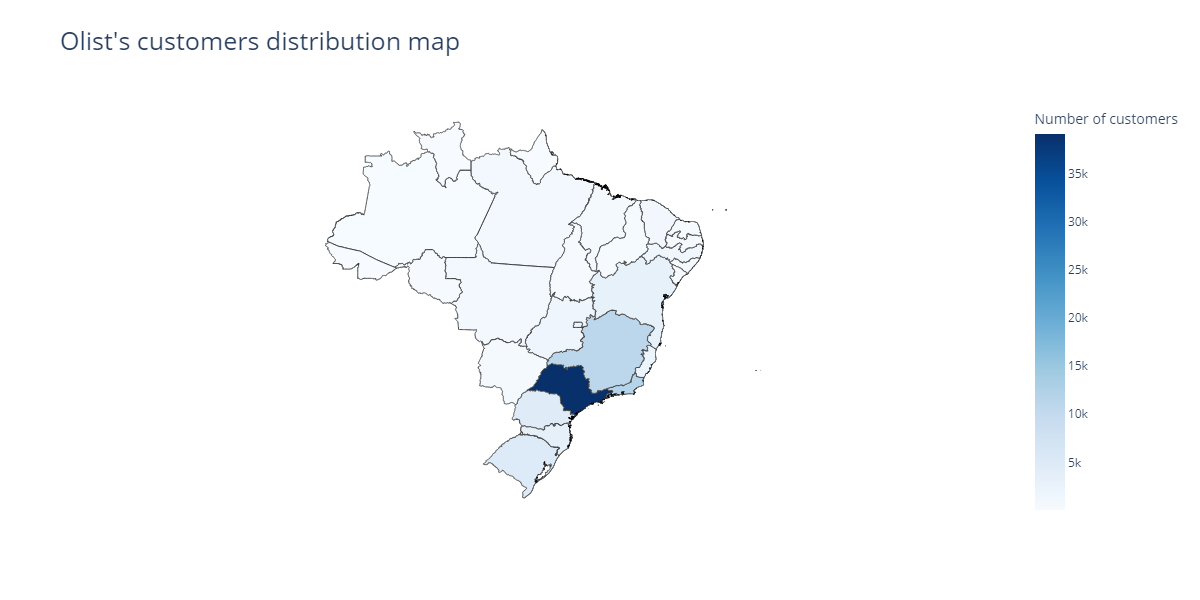

In [18]:
# Display map
Image(filename = '../image/customers_by_state_map.png', width=1200)

**Comment:** It can be seen that Olist's customers are distributed mainly in the Southeast of Brazil. In which, customers are most concentrated in SP state with 39156 customers. More specifically, we can see the top 10 states with the most customers in the chart below.

In [19]:
print(state_df.head(10).State.tolist())

['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'DF', 'ES', 'GO']


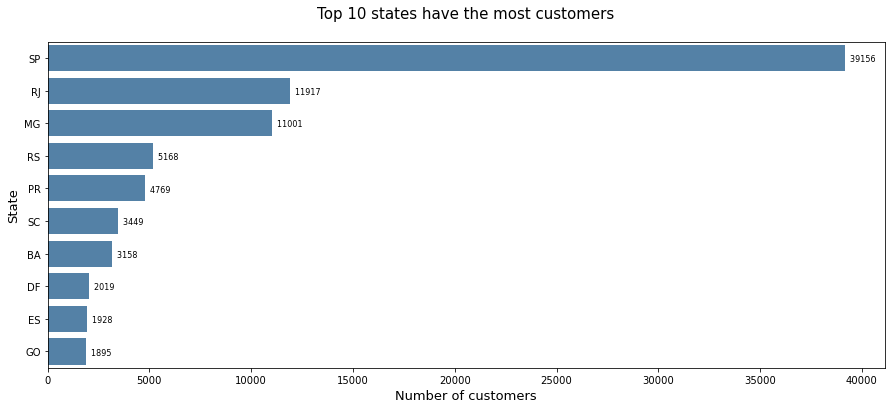

In [20]:
# Visualize top 10 states have the most customers
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(y='State', x='Number of customers', data=state_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 states have the most customers\n', fontsize=15)
ax.set_xlabel('Number of customers', fontsize=13)
ax.set_ylabel('State', fontsize=13)
for i, v in enumerate(state_df.head(10)['Number of customers']):
    ax.text(v, i+0.10, '  {}'.format(v), color='black', ha='left', fontsize=8)
plt.show()

As for the distribution of customers by city

In [21]:
# Calculate number of customers by city
city_df = delivered_data.groupby(['customer_country', 'customer_state', 'customer_city']).agg({'customer_unique_id':'nunique'})\
                        .sort_values(by='customer_unique_id', ascending=False).reset_index() \
                        .rename(columns={'customer_country':'Country', 'customer_state':'State', 'customer_city':'City', 'customer_unique_id':'Number of customers'}) 
print('Shape:', city_df.shape)
city_df.head(10)

Shape: (4272, 4)


,Country,State,City,Number of customers
0,Brazil,SP,sao paulo,14528
1,Brazil,RJ,rio de janeiro,6361
2,Brazil,MG,belo horizonte,2606
3,Brazil,DF,brasilia,2013
4,Brazil,PR,curitiba,1434
5,Brazil,SP,campinas,1363
6,Brazil,RS,porto alegre,1292
7,Brazil,BA,salvador,1154
8,Brazil,SP,guarulhos,1111
9,Brazil,SP,sao bernardo do campo,881


In [22]:
print(city_df.head(10).City.tolist())

['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba', 'campinas', 'porto alegre', 'salvador', 'guarulhos', 'sao bernardo do campo']


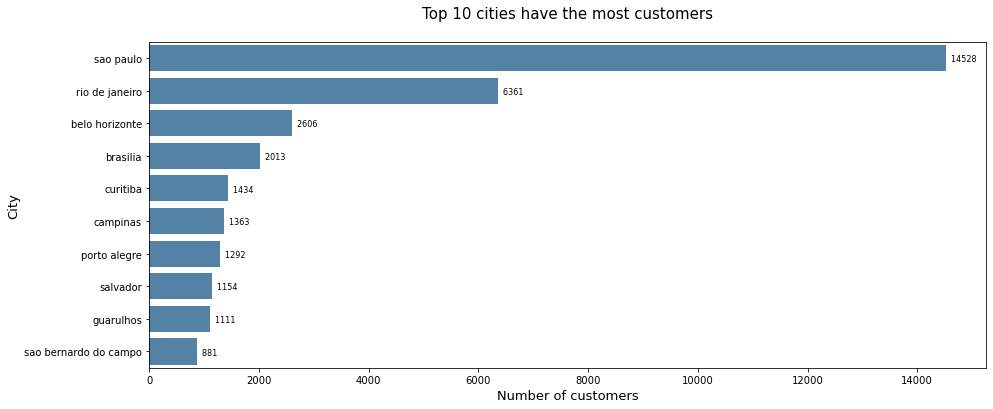

In [23]:
# Visualize top 10 cities have the most customers
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(y='City', x='Number of customers', data=city_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 cities have the most customers\n', fontsize=15)
ax.set_xlabel('Number of customers', fontsize = 13)
ax.set_ylabel('City', fontsize=13)
for i, v in enumerate(city_df.head(10)['Number of customers']):
    ax.text(v, i+0.10, '  {}'.format(v), color='black', ha='left', fontsize=8)
plt.show()

**Comment:** It can be seen that sao paulo is the city have the most customers. In the top 10 cities with the most customers, there are 4 cities in SP state: sao paulo, campinas, guarulhos, sao bernardo do campo.

## Olist's customer ordering behavior

In [24]:
days_dict = {0:'Monday',
             1:'Tuesday',
             2:'Wednesday',
             3:'Thursday',
             4:'Friday',
             5:'Saturday',
             6:'Sunday'}

In [25]:
# Extract 'day' and 'hour' of orders from 'delivered_data' as 'order_df'
order_df = delivered_data[['order_id', 'order_purchase_timestamp']]
order_df['day_of_week'] = order_df.order_purchase_timestamp.dt.dayofweek
order_df['day'] = order_df.day_of_week.map(days_dict)
order_df['hour'] = order_df.order_purchase_timestamp.dt.hour
order_df

,order_id,order_purchase_timestamp,day_of_week,day,hour
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,Tuesday,15
1,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,4,Friday,20
2,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,5,Saturday,16
3,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,Tuesday,16
4,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,6,Sunday,9
...,...,...,...,...,...
96473,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,5,Saturday,15
96474,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,2,Wednesday,8
96475,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,6,Sunday,20
96476,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,4,Friday,21


In [26]:
# Calculate number of orders by hour of weekday
order_by_day_hour_df = order_df.groupby(['day', 'hour']).agg({'order_id':'nunique'}).reset_index().rename(columns={'day':'Day', 'hour':'Hour', 'order_id':'Number of orders'})
order_by_day_hour_df

,Day,Hour,Number of orders
0,Friday,0,412
1,Friday,1,210
2,Friday,2,66
3,Friday,3,46
4,Friday,4,39
...,...,...,...
163,Wednesday,19,822
164,Wednesday,20,881
165,Wednesday,21,927
166,Wednesday,22,855


In [27]:
# Calculate number of orders by weekday
order_by_day = order_by_day_hour_df.groupby('Day').agg({'Number of orders':'sum'}).sort_values(by='Number of orders', ascending=False).reset_index()
order_by_day

,Day,Number of orders
0,Monday,15701
1,Tuesday,15503
2,Wednesday,15076
3,Thursday,14323
4,Friday,13685
5,Sunday,11635
6,Saturday,10555


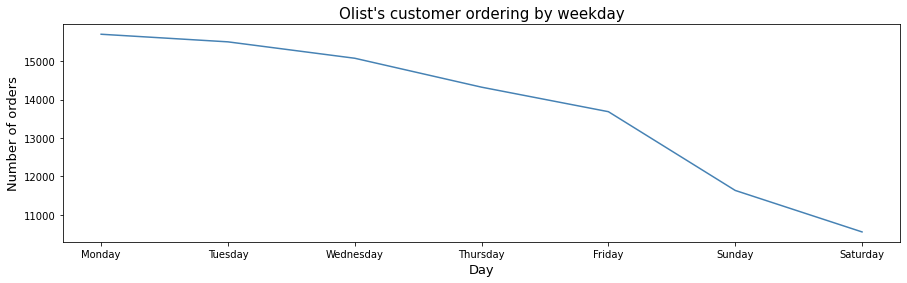

In [28]:
# Visualize Olist's customer ordering by weekday
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(y='Number of orders', x='Day', data=order_by_day, color='steelblue', ax=ax)
# sns.despine(bottom = True, left = True)
ax.set_title('Olist\'s customer ordering by weekday', fontsize=15)
ax.set_xlabel('Day', fontsize=13)
ax.set_ylabel('Number of orders', fontsize=13)
# ax.set_yticks(np.arange(0, 18000, 1000))
plt.show()

**Comment**: The number of orders can be seen steadily decreasing from Monday to Sunday.

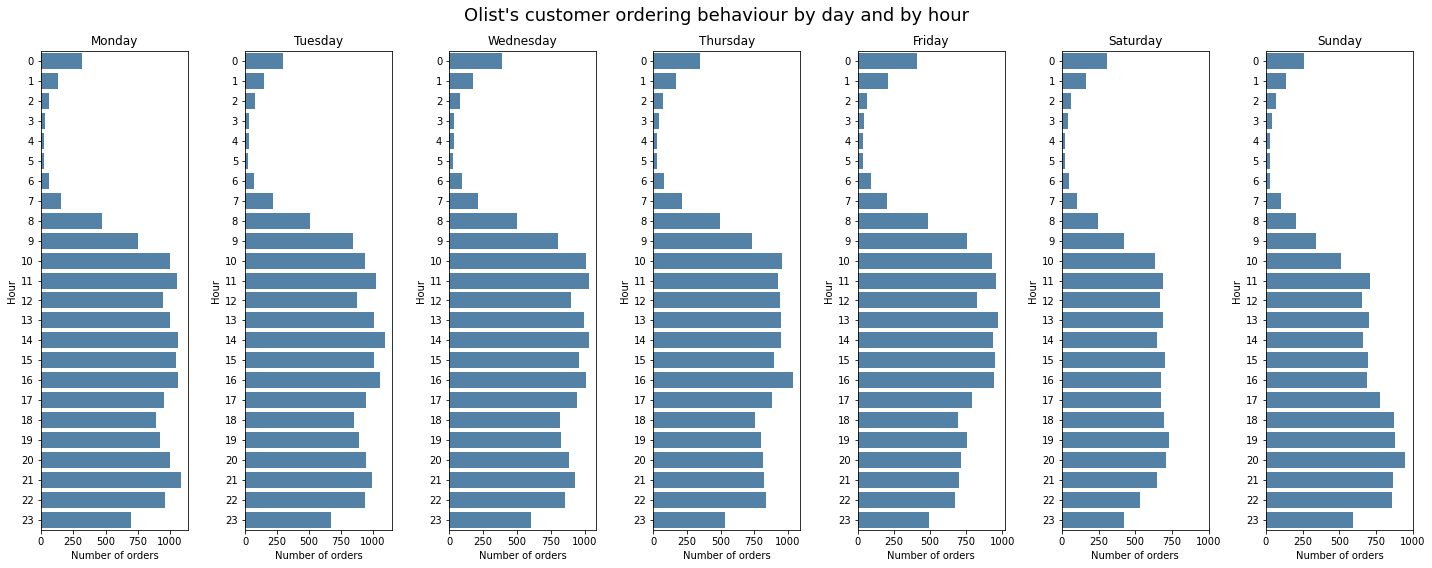

In [29]:
# Visualize Olist's customer ordering by hour of weekday
fig, ax = plt.subplots(1, 7, figsize=(20, 8))
list_days = []
for i, day in enumerate(days_dict.values()):
    sns.barplot(x='Number of orders', y='Hour', data=order_by_day_hour_df[order_by_day_hour_df.Day==day], orient = 'h', color='steelblue', ax=ax[i])
    ax[i].set_title(day)
    ax[i].set_xticks(np.arange(0, 1250, 250))
plt.suptitle('Olist\'s customer ordering behaviour by day and by hour', fontsize=18)
plt.tight_layout()
plt.show()

**Comment**: Based on the above chart, it can be seen that:
- From Monday to Thursday: Customers tend to buy goods fairly regularly in the time frame from 9h-22h (all above 750, except for Thursday's 9h with a little less than 750). Especially, the time frames 10h-11h, 13h-17h can reach over 900 to more than 1000 orders (except for 17h on Thursday). In addition, the time frames from 19h-22h on Monday, 20h-22h on Tuesday, and 21h on Wednesday also achieved the above results.

- Friday: Customers tend to buy more in the morning and afternoon than at night, the time frames with the number of orders over 750 is from 9h-17h, 19h and gradually decreases after 19h.

- Saturday: The number of orders in the time frames decreased compared to the previous days. There is no time frame to reach 750 orders. However, from 9h-22h, the number of orders still reached over 500 orders.

- Sunday: In contrast to Friday, customers tend to buy more at night than in the morning and afternoon. The time frame with the number of orders over 750 is from 17-22h.

- On all days of the week, the number of orders tends to decrease significantly from 23h, however, except Friday, this time frame is over 500 orders. The number of orders started to show signs of increasing slightly from 6h and increased sharply to over 500 orders (may be over 750 orders from Monday to Thursday) from 9h, except Saturday and Sunday 1 hour later because these are usually non-working days.

# Segmentation

## RFM 

In [30]:
# Group column 'total_order_value' by columns 'customer_unique_id', 'order_purchase_timestamp' using sum
rfm_data = delivered_data.groupby(['customer_unique_id', 'order_purchase_timestamp']).agg({'total_order_value':'sum'}).reset_index()
print('Shape:', rfm_data.shape)
rfm_data.head()

Shape: (96211, 3)


,customer_unique_id,order_purchase_timestamp,total_order_value
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,196.89


### Recency

In [31]:
# Find min and max timestamp customers has purchased
print('Min Date:', rfm_data['order_purchase_timestamp'].min(), '\nMax Date:', rfm_data['order_purchase_timestamp'].max())

Min Date: 2016-09-15 12:16:38 
Max Date: 2018-08-29 15:00:37


In [32]:
# Calculate recency of unique customers
recency_df = (rfm_data['order_purchase_timestamp'].max() - rfm_data.groupby('customer_unique_id').agg({'order_purchase_timestamp':'max'})) \
            .rename(columns = {'order_purchase_timestamp':'recency'})
recency_df['recency'] = recency_df['recency'].dt.days
print('Shape:', recency_df.shape)
recency_df.head()

Shape: (93358, 1)


,recency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,536
0000f6ccb0745a6a4b88665a16c9f078,320
0004aac84e0df4da2b147fca70cf8255,287


### Frequency

In [33]:
# Calculate frequency of unique customers
frequency_df = rfm_data.groupby('customer_unique_id').agg({'order_purchase_timestamp':'nunique'}).rename(columns={'order_purchase_timestamp': 'frequency'})
print('Shape:', frequency_df.shape)
frequency_df.head()

Shape: (93358, 1)


,frequency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


### Monetary

In [34]:
# Calculate monetary of unique customers
monetary_df = rfm_data.groupby('customer_unique_id').agg({'total_order_value':'sum'}).rename(columns={'total_order_value':'monetary'})
print('Shape:', monetary_df.shape)
monetary_df.head()

Shape: (93358, 1)


,monetary
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
0000f46a3911fa3c0805444483337064,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89


### RFM Score

In [35]:
# Concatenate 3 data frames 'recency_df', 'frequency_df', 'monetary_df' as 'rfm_df'
rfm_df = pd.concat([recency_df, frequency_df, monetary_df], axis=1)
print('Shape:', rfm_df.shape)
rfm_df.head()

Shape: (93358, 3)


,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89


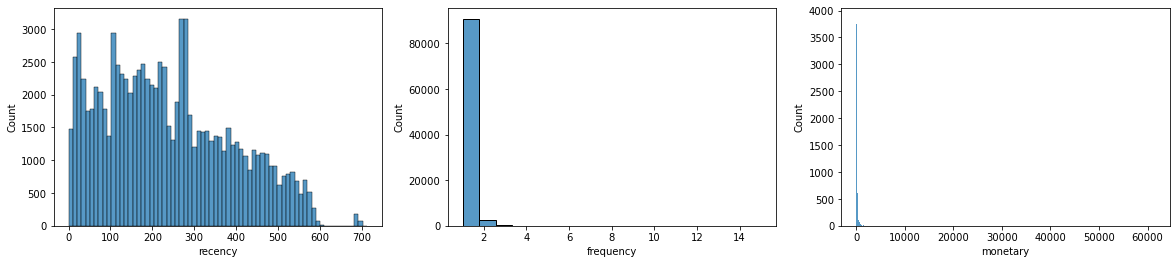

In [36]:
# Histogram of columns 'recency', 'frequency', 'monetary'
fig, ax = plt.subplots(1, 3, figsize=[20, 4])
sns.histplot(x='recency', data=rfm_df, ax=ax[0])
sns.histplot(x='frequency', data=rfm_df, ax=ax[1])
sns.histplot(x='monetary', data=rfm_df, ax=ax[2])
plt.show()

In [37]:
# Describe of 'rfm_df'
rfm_df.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
recency,93358.0,236.941773,152.591453,0.00,8.00,22.00,113.0,218.0,345.0000,465.000,519.00,574.0000,713.00
frequency,93358.0,1.030560,0.200469,1.00,1.00,1.00,1.0,1.0,1.0000,1.000,1.00,2.0000,15.00
monetary,93358.0,188.312063,402.244715,9.59,22.75,32.69,63.6,111.7,194.7975,361.105,571.85,1359.0123,61488.36


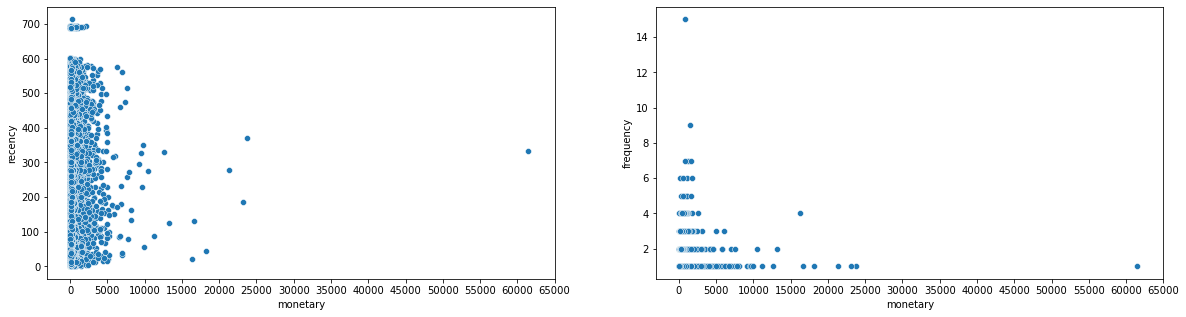

In [38]:
# Visualize scatter plot between columns 'monetary' - 'recency' and 'monetary' - 'frequency' of 'rfm_df'
fig, ax = plt.subplots(1,2, figsize=[20, 5])
sns.scatterplot(x='monetary', y='recency', data=rfm_df, ax=ax[0])
ax[0].set_xticks(np.arange(0, 70000, 5000))
sns.scatterplot(x='monetary', y='frequency', data=rfm_df, ax=ax[1])
ax[1].set_xticks(np.arange(0, 70000, 5000))
plt.show()

**Comment:** It can be seen that in order to better segment customers according to RFM model, it is necessary to remove outliers. From the table above, we can remove the data with monetary outside the 99th percentile. However, through the scatter plot, we see that the data is highly concentrated with monetary <= 5000. Through the testing process, the author finds that removing data with monetary > 5000 would be more appropriate. Besides, it's not necessary to filter the frequency data.

In [39]:
# Remove ouliers
rfm = rfm_df[(rfm_df.monetary < 5000) ]   #rfm_temp.monetary.quantile(0.99) & (rfm_df.frequency < 8)
print('Removed {} records'.format(rfm_df.shape[0] - rfm.shape[0]))
print('Shape:', rfm.shape)
rfm.head()

Removed 45 records
Shape: (93313, 3)


,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89


In [40]:
# Create function to cluster customers using KMeans
def score(data, n_clusters, random_state, ascending=False):
    data_copy = data.copy()
    
    # Standardization of a data
    scaler = StandardScaler()
    scaler = scaler.fit(data_copy)
    data_copy = scaler.transform(data_copy)
    
    # Cluster and assign score
    kmeans_cluster = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_copy)
    data['cluster'] = kmeans_cluster.labels_
    mean_group = data.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1], ascending=ascending)
    mean_group['score'] = [i for i in range(n_clusters, 0, -1) ]
    cluster_map = mean_group.set_index('cluster').to_dict()['score']
    
    return data['cluster'].map(cluster_map)

In [41]:
# Apply function 
r_score = score(rfm[['recency']], n_clusters=5, random_state=1, ascending=True)
f_score = score(rfm[['frequency']], n_clusters=5, random_state=1, ascending=False)
m_score = score(rfm[['monetary']], n_clusters=5, random_state=1, ascending=False)

# Add columns 'r_score', 'f_score', 'm_score' to 'frm'
rfm = rfm.assign(r_score = r_score, f_score = f_score, m_score = m_score) 

In [42]:
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,1
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,3,1,2


In [43]:
# Create columns 'rfm_score' by concatenating columns 'r_score', 'f_score', 'm_score'
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score'] = rfm['rfm_score'].astype(int)
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,1,411
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,1,111
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,3,1,2,312


In [44]:
# Describe of 'recency' of 'r_score'
rfm.groupby('r_score')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
r_score,,,,,,,,
1,11604.0,509.877887,48.953515,444.0,470.0,503.0,541.0,713.0
2,15321.0,377.475034,35.314594,319.0,347.0,377.0,407.0,443.0
3,22147.0,259.867070,30.891331,207.0,231.0,265.0,281.0,318.0
4,24282.0,152.457623,30.938022,101.0,125.0,153.0,180.0,206.0
5,19959.0,47.776893,27.692937,0.0,23.0,43.0,72.0,100.0


In [45]:
# Describe of 'frequency' of 'f_score'
rfm.groupby('f_score')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
f_score,,,,,,,,
1,90756.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
2,2357.0,2.000000,0.000000,2.0,2.0,2.0,2.00,2.0
3,183.0,3.147541,0.355617,3.0,3.0,3.0,3.00,4.0
4,16.0,5.875000,1.147461,5.0,5.0,5.5,6.25,9.0
5,1.0,15.000000,NaN,15.0,15.0,15.0,15.00,15.0


In [46]:
# Describe of 'monetary' of 'm_score'
rfm.groupby('m_score')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
m_score,,,,,,,,
1,67815.0,89.102445,43.238532,9.59,53.0000,82.350,121.9450,183.40
2,19680.0,277.886578,79.846936,183.43,211.6225,254.010,329.2850,492.36
3,4513.0,706.755961,167.515675,492.38,567.9500,664.260,819.3400,1140.88
4,1106.0,1576.944548,356.940537,1142.70,1281.1200,1468.175,1821.8575,2477.16
5,199.0,3380.465628,701.097139,2496.25,2788.2850,3209.720,3857.1800,4978.63


## Assign segment

### Segment from RFM analysis

**<center>Meaning of segments</center>**

| Segment              | Activity                                                         | Detail                                                              |
|----------------------|------------------------------------------------------------------|---------------------------------------------------------------------|
| Champions            | Order often at high value                                        | monetary >= 1146, frequency >= 2,  recency < 312                    |
| Loyal Customers      | Order often                                                      | monetary < 1146, frequency >= 2,  recency < 312                     |     
| Potential Champions  | Recently purchased, but at high value, in the future can become Champions | monetary >= 1146, frequency = 1,  recency <= 200                     | 
| New Customers        | Recently purchased, in the future can become Loyal Customers     | monetary < 1146, frequency = 1,  recency <= 200                      |
| Need Attention       | Bought at high value but have not returned in an acceptable time | monetary >= 1146, (frequency = 1,  201 <= recency <= 312) or (2 <= frequency <= 15,  313 <= recency <= 438)                                                                                                                                     | 
| About To Sleep       | Have not returned in an acceptable time                          | monetary < 1146, (frequency <= 2,  201 <= recency <= 312) or (frequency >= 5,  313 <= recency <= 438)                                                                                                                                              |
| Can't Lose Them      | Bought at high value but have not returned for a long time       | monetary >= 1146, (frequency = 1,  313 <= recency <= 438) or (frequency <= 15,  recency > 438)                                                                                                                                                  |        
| At Risk              | Have not returned for a long time                                | monetary < 1146, (frequency <=4,  313 <= recency <= 438) or (frequency >= 5,  recency > 438)                                                                                                                                                  |         
| Lost customers       | Have not come back for a very long time                          | monetary < 1146, frequency <= 4,  recency > 438                     |     

In [47]:
# Import RFM file created manually by author
seg_df = pd.read_excel('../data/rfm/RFM.xlsx')
seg_df.head()

,R,F,M,RFM,Segment
0,5,5,5,555,Champions
1,5,5,4,554,Champions
2,5,5,3,553,Loyal Customers
3,5,5,2,552,Loyal Customers
4,5,5,1,551,Loyal Customers


In [48]:
# Print segments with their's RFM score
for seg in seg_df.Segment.unique():
    print(seg + ':', seg_df[seg_df.Segment==seg].RFM.tolist())

Champions : [555, 554, 545, 544, 535, 534, 525, 524, 455, 454, 445, 444, 435, 434, 425, 424, 355, 354, 345, 344, 335, 334, 325, 324]
Loyal Customers: [553, 552, 551, 543, 542, 541, 533, 532, 531, 523, 522, 521, 453, 452, 451, 443, 442, 441, 433, 432, 431, 423, 422, 421, 353, 352, 351, 343, 342, 341, 333, 332, 331]
Potential Champions: [515, 514, 415, 414]
New Customers : [513, 512, 511, 413, 412, 411]
About To Sleep  : [323, 322, 321, 313, 312, 311, 253, 252, 251, 243, 242, 241]
Need Attention: [315, 314, 255, 254, 245, 244, 235, 234, 225, 224]
At Risk: [233, 232, 231, 223, 222, 221, 213, 212, 211, 153, 152, 151, 143, 142, 141]
Can't Lose Them: [215, 214, 155, 154, 145, 144, 135, 134, 125, 124, 115, 114]
Lost customers : [133, 132, 131, 123, 122, 121, 113, 112, 111]


In [49]:
# Create function to segment customers
def segment(data):
    if data in [555, 554, 545, 544, 535, 534, 525, 524, 455, 454, 445, 444, 435, 434, 425, 424, 355, 354, 345, 344, 335, 334, 325, 324]:
        return 'Champions'
    elif data in [553, 552, 551, 543, 542, 541, 533, 532, 531, 523, 522, 521, 453, 452, 451, 443, 442, 441, 433, 432, 431, 423, 422, 421, 353, 352, 351, 343, 342, 341, 333, 332, 331]:
        return 'Loyal Customers'
    elif data in [515, 514, 415, 414]:
        return 'Potential Champions'
    elif data in [513, 512, 511, 413, 412, 411]:
        return 'New Customers'
    elif data in [323, 322, 321, 313, 312, 311, 253, 252, 251, 243, 242, 241]:
        return 'About To Sleep'
    elif data in [315, 314, 255, 254, 245, 244, 235, 234, 225, 224]:
        return 'Need Attention'
    elif data in [233, 232, 231, 223, 222, 221, 213, 212, 211, 153, 152, 151, 143, 142, 141]:
        return 'At Risk'
    elif data in [215, 214, 155, 154, 145, 144, 135, 134, 125, 124, 115, 114]:
        return 'Can\'t Lose Them'
    else:   # elif data in [133, 132, 131, 123, 122, 121, 113, 112, 111]:
        return 'Lost Customers'

In [50]:
# Add column 'segment' to 'rfm'
rfm['segment'] = rfm['rfm_score'].apply(segment)
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,1,411,New Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,1,111,Lost Customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211,At Risk
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,3,1,2,312,About To Sleep


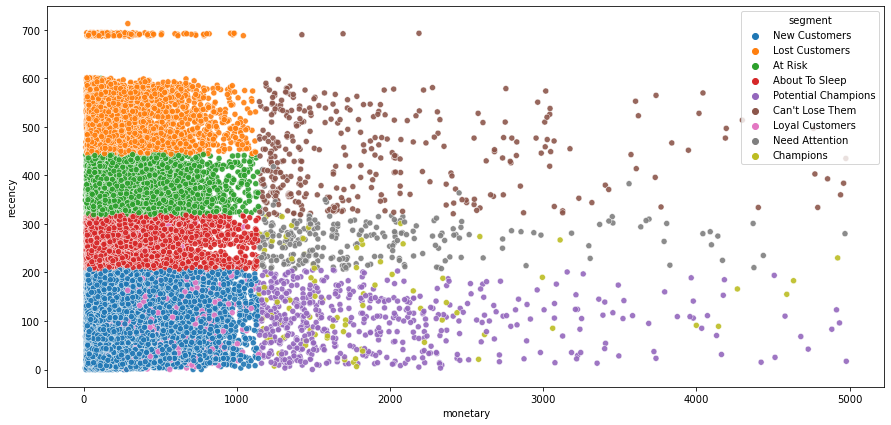

In [51]:
# Visualize segments by RFM based on scatter plot of 2 variables 'monetary' and 'recency' 
fig, ax = plt.subplots(figsize=[15, 7])
sns.scatterplot(x='monetary', y='recency', data=rfm, ax=ax, hue='segment', alpha=0.9)
plt.show()

### Add VIP segment - include previously filtered customers

**Note:** `rfm_df` and `rfm` are different

In [52]:
# Add column 'segment' to 'rfm_df'
rfm_df['segment'] = rfm['rfm_score'].apply(segment)
rfm_df.head()

,recency,frequency,monetary,segment
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,New Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,New Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,Lost Customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,At Risk
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,About To Sleep


In [53]:
# Check null values of 'rfm_df'
rfm_df.isnull().sum()

recency       0
frequency     0
monetary      0
segment      45
dtype: int64

In [54]:
# Replace null values with 'VIP' - a segment
rfm_df.fillna('VIP', inplace=True)

In [55]:
# Show 'VIP' Segment
rfm_df[rfm_df.segment=='VIP'].head()

,recency,frequency,monetary,segment
customer_unique_id,,,,
09e9991c50513a303a2da26619870d7f,231,1,6765.00,VIP
0a0a92112bd4c708ca5fde585afaa872,333,1,61488.36,VIP
0f5ac8d5c31de21d2f25e24be15bbffb,275,2,10443.54,VIP
11f97da02237a49c8e783dfda6f50e8e,575,1,6264.00,VIP
12138e8ba93973c9b561253683f5581b,85,1,6553.40,VIP


## Final result

In [56]:
# Show 'rfm_df'
print('Shape:', rfm_df.shape)
rfm_df.head()

Shape: (93358, 4)


,recency,frequency,monetary,segment
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,New Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,New Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,Lost Customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,At Risk
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,About To Sleep


In [57]:
# Calculate Q1, Q3, IQR, Lower Limit, Upper Limit of each segment
avg_sales_segment = rfm_df.groupby('segment')['monetary'].describe()[['25%', '75%']] 
avg_sales_segment['iqr'] = avg_sales_segment['75%'] - avg_sales_segment['25%']
avg_sales_segment['lower_limit'] = avg_sales_segment['25%'] - 1.5 * avg_sales_segment['iqr']
avg_sales_segment['upper_limit'] = avg_sales_segment['75%'] + 1.5 * avg_sales_segment['iqr']
avg_sales_segment

,25%,75%,iqr,lower_limit,upper_limit
segment,,,,,
About To Sleep,63.100,188.6775,125.5775,-125.26625,377.04375
At Risk,64.090,185.8900,121.8000,-118.61000,368.59000
Can't Lose Them,1270.230,2064.7600,794.5300,78.43500,3256.55500
Champions,1308.335,1993.7475,685.4125,280.21625,3021.86625
Lost Customers,60.680,186.4600,125.7800,-127.99000,375.13000
Loyal Customers,155.685,401.8350,246.1500,-213.54000,771.06000
Need Attention,1346.970,2057.0250,710.0550,281.88750,3122.10750
New Customers,62.590,186.1000,123.5100,-122.67500,371.36500
Potential Champions,1321.000,2153.3500,832.3500,72.47500,3401.87500


In [58]:
# Create dictionaries of Lower Limit and Upper Limit of each segment
lower_limit_dict = avg_sales_segment[['lower_limit']].to_dict()['lower_limit']
upper_limit_dict = avg_sales_segment[['upper_limit']].to_dict()['upper_limit']
print('Lower Limit Dict:', lower_limit_dict,'\n')
print('Upper Limit Dict:', upper_limit_dict)

Lower Limit Dict: {'About To Sleep': -125.26625000000004, 'At Risk': -118.60999999999999, "Can't Lose Them": 78.43499999999972, 'Champions': 280.2162500000002, 'Lost Customers': -127.99000000000001, 'Loyal Customers': -213.54000000000002, 'Need Attention': 281.8875000000005, 'New Customers': -122.67499999999998, 'Potential Champions': 72.47500000000014, 'VIP': 66.96000000000095} 

Upper Limit Dict: {'About To Sleep': 377.04375000000005, 'At Risk': 368.59, "Can't Lose Them": 3256.5550000000003, 'Champions': 3021.86625, 'Lost Customers': 375.13, 'Loyal Customers': 771.0600000000001, 'Need Attention': 3122.107499999999, 'New Customers': 371.365, 'Potential Champions': 3401.875, 'VIP': 15891.6}


In [59]:
# Add columns 'lower_limit', 'upper_limit' to 'rfm_df'
rfm_df['lower_limit'] = rfm_df['segment'].map(lower_limit_dict)
rfm_df['upper_limit'] = rfm_df['segment'].map(upper_limit_dict)
rfm_df.head()

,recency,frequency,monetary,segment,lower_limit,upper_limit
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,New Customers,-122.67500,371.36500
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,New Customers,-122.67500,371.36500
0000f46a3911fa3c0805444483337064,536,1,86.22,Lost Customers,-127.99000,375.13000
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,At Risk,-118.61000,368.59000
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,About To Sleep,-125.26625,377.04375


In [60]:
# Condition to filter outliers
cond = (rfm_df.monetary < rfm_df.lower_limit) | (rfm_df.monetary > rfm_df.upper_limit)

# Calculate average sales per customer of each segment
avg_sales_segment = rfm_df[~cond].groupby('segment')['monetary'].describe()[['mean']].sort_values(by='mean', ascending=False).reset_index() \
                           .rename(columns={'segment':'Segment', 'mean':'Average sales per customer'})
avg_sales_segment

,Segment,Average sales per customer
0,VIP,7421.077368
1,Potential Champions,1733.021619
2,Can't Lose Them,1684.133978
3,Need Attention,1647.882510
4,Champions,1629.678974
5,Loyal Customers,275.885048
6,About To Sleep,121.971562
7,New Customers,120.164972
8,At Risk,119.591309
9,Lost Customers,119.401734


In [61]:
# Calculate number of customers and percentage of each segment
customer_structure = rfm_df['segment'].value_counts().reset_index().rename(columns={'index':'Segment', 'segment':'Number of customers'})
customer_structure['Percentage'] = round(customer_structure['Number of customers'] / customer_structure['Number of customers'].sum() * 100, 2)
customer_structure

,Segment,Number of customers,Percentage
0,New Customers,42323,45.33
1,About To Sleep,21832,23.39
2,At Risk,15085,16.16
3,Lost Customers,11437,12.25
4,Loyal Customers,1331,1.43
5,Potential Champions,557,0.60
6,Can't Lose Them,392,0.42
7,Need Attention,270,0.29
8,Champions,86,0.09
9,VIP,45,0.05


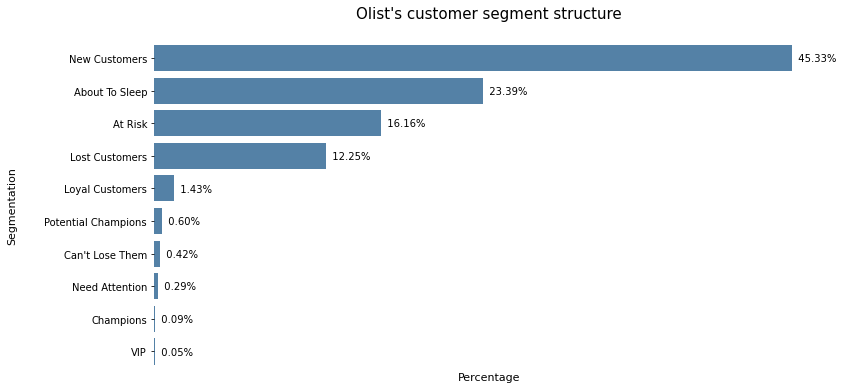

In [62]:
# Visualize Olist's customer segment structure
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=customer_structure['Percentage'], y=customer_structure['Segment'], data=customer_structure, ax=ax, color='steelblue')
sns.despine(bottom = True, left = True)
ax.set_title('Olist\'s customer segment structure\n', fontsize=15)
ax.set_xlabel('Percentage', fontsize=11)
ax.set_ylabel('Segmentation\n\n', fontsize=11)
ax.set(xticks=[])
for i, v in enumerate(customer_structure['Percentage']):
    ax.text(v, i+0.10, '  {:.2f}'.format(v) + '%', color='black', ha='left')
plt.show()